In [ ]:
#| default_exp theory

# Libs

In [1]:
#| export
import numpy as np
from tqdm.auto import tqdm
from scipy.special import zeta

In [2]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

def add_colorbar(vec, ax, label):
    normalize = mcolors.Normalize(vmin=vec.min(), vmax=vec.max())
    colormap = plt.cm.plasma
    scalarmappaple = plt.cm.ScalarMappable(norm=normalize, cmap=colormap)
    scalarmappaple.set_array(vec)
    cbar = fig.colorbar(scalarmappaple, ax = ax)
    cbar.set_label(label)

import matplotlib
plt.rcParams.update({'font.size': 12})
plt.rc('axes', labelsize=12) 
plt.rcParams["figure.figsize"] = (4,3)

In [3]:
#| export
def prob_L(L, Ps):
    '''
    :L (scalar): number of steps
    :Ps (array): probability of staying, at each L
    '''    
    return (1-Ps[L])*np.prod(Ps[:L])

# Constant $P_s$

In [ ]:
L_max = 50
Ps = np.ones(L_max)*(1/2)

p_l = []
for l in range(0, L_max-1):
    p_l.append(prob_L(l, Ps))    

(0.0001, 1)

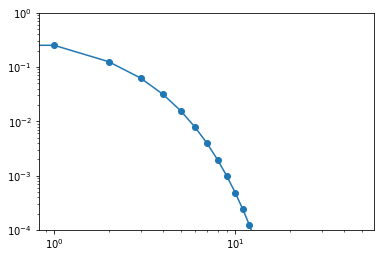

In [ ]:
plt.loglog(p_l, 'o-')
plt.ylim(1e-4,1)

**Numerical check**

In [ ]:
runs = int(1e6)
num_l = np.zeros(runs)

for run in tqdm(range(runs)):
    
    for l in range(L_max):
        if np.random.rand() > Ps[l]:
            break
            
    num_l[run] = l
counts = np.bincount(num_l.astype(int))

  0%|          | 0/1000000 [00:00<?, ?it/s]

(1e-06, 1)

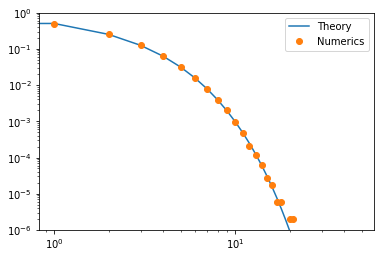

In [ ]:
plt.loglog(p_l/max(p_l), label = 'Theory')
plt.loglog(counts/max(counts), 'o', label = 'Numerics')
plt.legend()
plt.ylim(1e-6,1)

# Reaching power law $P(L)$ - recurrent calculation of $P_s(l)$

In [4]:
#| export
from scipy.special import zeta

def get_ps(L, alpha, ps_0 = 1):
    
    ps = np.zeros(L)
    ps[0] = ps_0    
    
    for l in range(2, L+1):
                
        # product
        prod = np.prod(ps[:l-1])
        # P(L-1)
        p_lm1 = (1/zeta(alpha+1, q = 1))*(l-1)**(-alpha-1)
        # all together
        ps[l-1] = 1-p_lm1/prod
        
    return ps

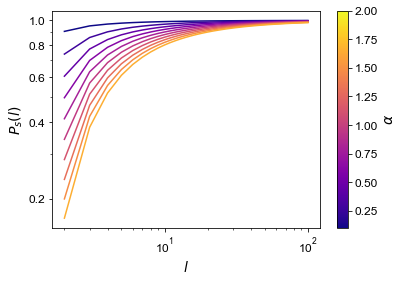

In [ ]:
L = 100
alphas = np.linspace(0.1, 2, 10)
colors = plt.cm.plasma(np.linspace(0,1,len(alphas)+2))

fig, ax = plt.subplots()
for alpha, color in zip(alphas, colors):
    ps = get_ps(L, alpha = alpha, ps_0 = 1)
    ax.loglog(np.arange(2, L+1), ps[1:], c = color)
plt.setp(ax, xlabel =r'$l$', ylabel = r'$P_s(l)$', 
         yticks = np.round(np.arange(0.2, 1.01, 0.2),1),
         yticklabels = np.round(np.arange(0.2, 1.01, 0.2),1).astype(str))

from matplotlib.ticker import ScalarFormatter, NullFormatter
# ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_minor_formatter(NullFormatter())


add_colorbar(alphas, ax, r'$\alpha$')

In [ ]:
ps_0 = []
alphas = np.linspace(0.01, 2, 50)
for alpha in alphas:
    ps_0.append(get_ps(2, alpha = alpha, ps_0 = 1)[-1])
    

Text(0.5, 0, '$\\beta$')

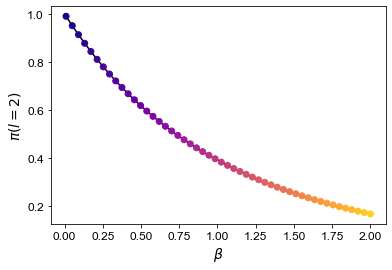

In [ ]:
fig, ax = plt.subplots()
ax.plot(alphas, ps_0, c = 'k', zorder = -1)
ax.scatter(alphas, ps_0, color = plt.cm.plasma(np.linspace(0,1,len(alphas)+5)[:-5]))
ax.set_ylabel('$\pi(l=2)$')
ax.set_xlabel(r'$\beta$')

## Computing $P(L)$ from $P_s$

#### Normal scenario

In [ ]:
L = 5000
alpha = 1.2
ps = get_ps(L, alpha = alpha)

p_l = []
for l in range(1, L):
    p_l.append(prob_L(l, ps))

<matplotlib.legend.Legend>

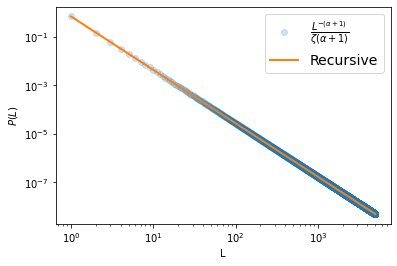

In [ ]:
PL= (1/zeta(alpha+1, q = 1))*np.arange(1,L).astype(float)**(-1-alpha)
plt.loglog(np.arange(1,L), PL, 'o', alpha = 0.2, label = r'$\frac{L^{-(\alpha+1)}}{\zeta(\alpha+1)}$')
plt.loglog(np.arange(1,L), p_l, lw = 2, label = 'Recursive')

# plt.loglog(np.arange(1,L).astype(float)**(-1))
plt.xlabel('L'); plt.ylabel(r'$P(L)$')
# plt.ylim(1e-8, 1)
plt.legend(fontsize = 14)

### Considering a cutoff after $n$ steps

In [ ]:
ps_cutoff = get_ps(L, alpha = alpha)
ps_cutoff[50:] = ps_cutoff[30]*

L_max = L
Ps = ps_cutoff.copy()
Pr = 1-Ps

p_l_cutoff = []
for l in range(1, L_max):
    p_l_cutoff.append(prob_L(l, Ps))

[<matplotlib.lines.Line2D>]

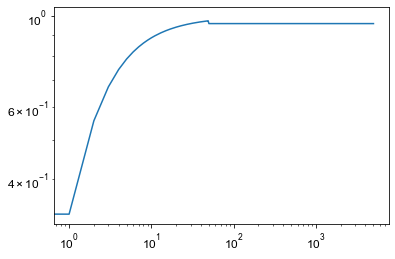

In [ ]:
plt.loglog(ps_cutoff)

<matplotlib.legend.Legend>

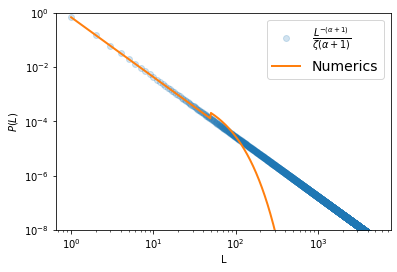

In [ ]:
PL= (1/zeta(alpha+1, q = 1))*np.arange(1,L).astype(float)**(-1-alpha)
plt.loglog(np.arange(1,L), PL, 'o', alpha = 0.2, label = r'$\frac{L^{-(\alpha+1)}}{\zeta(\alpha+1)}$')
plt.loglog(np.arange(1,L), p_l_cutoff, lw = 2, label = 'Numerics')

# plt.loglog(np.arange(1,L).astype(float)**(-1))
plt.xlabel('L'); plt.ylabel(r'$P(L)$')
plt.ylim(1e-8, 1)
plt.legend(fontsize = 14)

### Adding cutoff to powerlaw

In [5]:
#| export
from mpmath import polylog

def pw_exp(L, alpha = 1, xi = 0.01):
    # This is discrete!
    return L**(-1-alpha)*np.exp(-xi*L)/float(polylog(1+alpha, np.exp(-xi)))

(1e-06, 202.14361358778478)

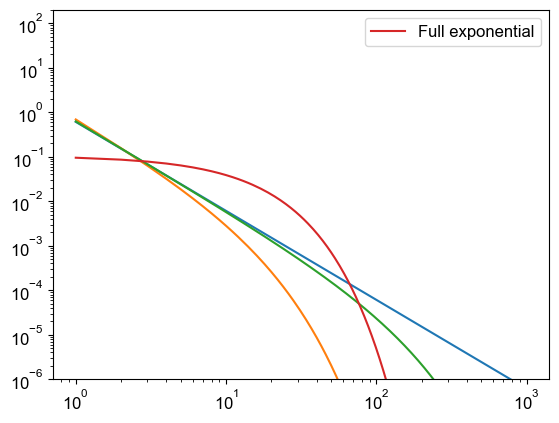

In [ ]:
Lmax = 1000
pl = pw_exp(np.arange(1,Lmax).astype(float), 1, 0)
plt.loglog(np.arange(1, Lmax), pl)

pl = pw_exp(np.arange(1,Lmax).astype(float), 1, 0.1)
plt.loglog(np.arange(1, Lmax), pl)

pl = pw_exp(np.arange(1,Lmax).astype(float), 1, 0.01)
plt.loglog(np.arange(1, Lmax), pl)

pl = pw_exp(np.arange(1,Lmax).astype(float), -1, 0.1)
plt.loglog(np.arange(1, Lmax), pl, label = 'Full exponential')
plt.legend()

plt.ylim(ymin = 1e-6)

In [ ]:
#| export
from scipy.special import zeta

def ps_exp_cutoff(L, alpha, xi, ps_0 = 1):
    
    ps = np.zeros(L)
    ps[0] = ps_0    
    
    for l in range(2, L+1):
                
        # product
        prod = np.prod(ps[:l-1])
        # P(L-1)
        p_lm1 = pw_exp(l-1, alpha, xi)
        # all together
        ps[l-1] = 1-p_lm1/prod
        
    return ps

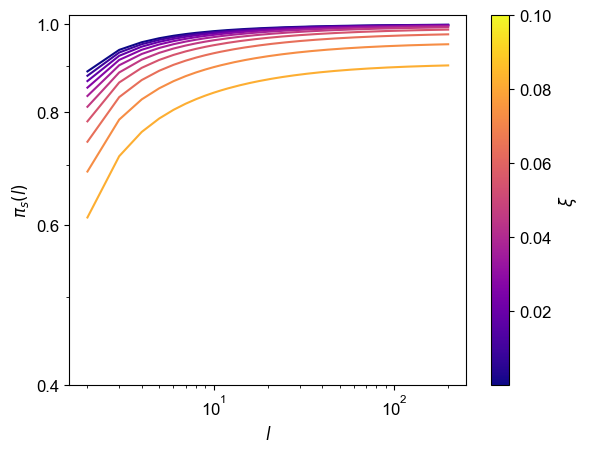

In [ ]:
L = 200
xis = np.logspace(-4, -1, 10)
colors = plt.cm.plasma(np.linspace(0,1,len(xis)+2))
alpha = 0.01
fig, ax = plt.subplots()

ps = np.zeros((len(xis), L))
for idx, (xi, color) in enumerate(zip(xis, colors)):
    ps[idx, :] = ps_exp_cutoff(L, alpha = alpha, xi = xi, ps_0 = 1)
    ax.loglog(np.arange(2, L+1), ps[idx, 1:], c = color)
    
plt.setp(ax, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
         yticks = np.round(np.arange(0.4, 1.01, 0.2),1),
         yticklabels = np.round(np.arange(0.4, 1.01, 0.2),1).astype(str))

from matplotlib.ticker import ScalarFormatter, NullFormatter
# ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_minor_formatter(NullFormatter())


add_colorbar(xis, ax, r'$\xi$')

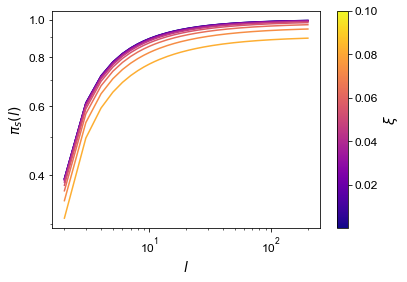

In [ ]:
L = 200
xis = np.logspace(-4, -1, 10)
colors = plt.cm.plasma(np.linspace(0,1,len(betas)+2))
alpha = 0.01
fig, ax = plt.subplots()

ps = np.zeros((len(betas), L))
for idx, (xi, color) in enumerate(zip(xis, colors)):
    ps[idx, :] = ps_exp_cutoff(L, alpha = alpha, xi = xi, ps_0 = 1)
    ax.loglog(np.arange(2, L+1), ps[idx, 1:], c = color)
    
plt.setp(ax, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
         yticks = np.round(np.arange(0.4, 1.01, 0.2),1),
         yticklabels = np.round(np.arange(0.4, 1.01, 0.2),1).astype(str))

from matplotlib.ticker import ScalarFormatter, NullFormatter
# ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_minor_formatter(NullFormatter())


add_colorbar(betas, ax, r'$\xi$')

[Text(0.5, 0, '$\\xi$'), None, Text(0.5, 0, '$\\xi$'), None]

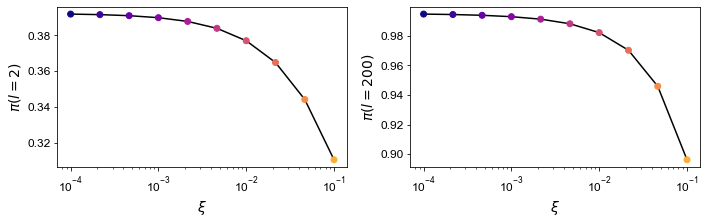

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (6*1.618, 3), constrained_layout = True)
ax[0].plot(betas, ps[:, 1], c = 'k', zorder = -1)
ax[0].scatter(betas, ps[:, 1], color = plt.cm.plasma(np.linspace(0,1,len(betas)+2)[:-2]))
ax[0].set_ylabel('$\pi(l=2)$')

ax[1].plot(betas, ps[:, -1], c = 'k', zorder = -1)
ax[1].scatter(betas, ps[:, -1], color = plt.cm.plasma(np.linspace(0,1,len(betas)+2)[:-2]))
ax[1].set_ylabel(fr'$\pi(l={L})$')

plt.setp(ax, xlabel = r'$\xi$', xscale = 'log')

# Composite Brownian

Some experimental values: probs = [0.867, 0.099, 0.034] , $\lambda$s = [0.28, 1.5, 14.5] mm

In [38]:
#| export
def prob_L_composite(L, num_modes = 3, lambdas = None, probs = None):  
    # if lambdas  is None:
    #     probs = np.random.rand(num_modes)
    #     probs/= np.sum(probs)
    # if lambdas is None:
    #     lambdas = 10*np.random.rand(num_modes)
        
    return np.sum((probs)*(np.exp(1/lambdas)-1)*np.exp(-L/lambdas))

In [39]:
#| export
def discrete_composite_sample(lambdas = None, probs = None, num_modes = 2, L_max=1000, num_samples = 1):
    P_L = [prob_L_composite(L = l, num_modes = num_modes, lambdas = lambdas, probs = probs) for l in np.arange(1,L_max)]
    # normalize to take into accont L_max not infinity
    P_L /= np.sum(P_L)
    return np.random.choice(np.arange(1, L_max), p = P_L, size = num_samples)

In [40]:
probs = [0.867, 0.01]
probs/= np.sum(probs)
lambdas = np.array([2,1500])

Ls = np.arange(1, 1000).astype(float)
p_l = np.zeros_like(Ls).astype(float)
for idxl, L in enumerate(Ls):
    p_l[idxl] = prob_L_composite(L, lambdas = lambdas, probs = probs)

(1e-05, 0.6915843229947076)

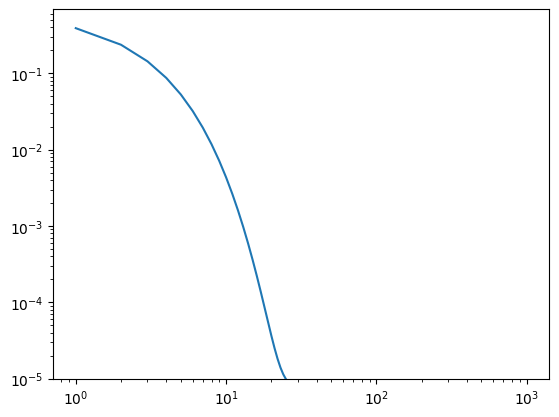

In [41]:
plt.loglog(Ls, p_l)
plt.ylim(ymin = 1e-5)

In [11]:
#| export
def get_ps_composite(L, lambdas = None, probs = None, ps_0 = 1):
    
    ps = np.zeros(L)
    ps[0] = ps_0    
    
    for l in range(2, L+1):
                
        # product
        prod = np.prod(ps[:l-1])
        # P(L-1)
        p_lm1 = prob_L_composite(l-1, lambdas = lambdas, probs = probs)
        # all together
        ps[l-1] = 1-p_lm1/prod
        
    return ps

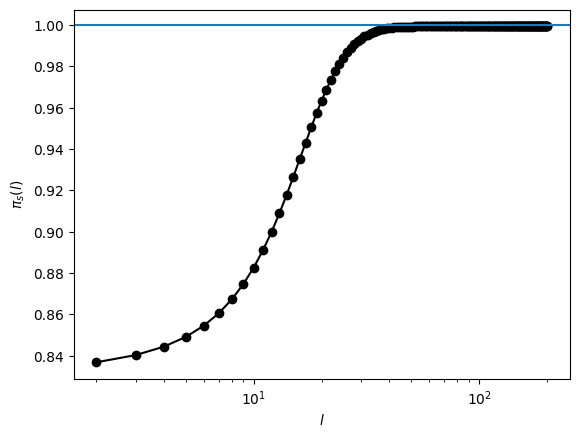

In [42]:
L = 200
probs = [0.9, 0.1]
probs/= np.sum(probs)
lambdas = np.array([5,1500])

colors = plt.cm.plasma(np.linspace(0,1,6+2))



ps_composite = get_ps_composite(L, lambdas = lambdas, probs = probs)

    
_, ax = plt.subplots()
ax.plot(np.arange(2, L+1), ps_composite[1:], '-o', c = 'k')

plt.setp(ax, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
         xscale = 'log') ;  
ax.axhline(1)

### Composite + hard cutoff

In [4]:
#| export
def prob_L_composite_cutoff(L, num_modes = 3, lambdas = None, probs = None):  
    # if lambdas  is None:
    #     probs = np.random.rand(num_modes)
    #     probs/= np.sum(probs)
    # if lambdas is None:
    #     lambdas = 10*np.random.rand(num_modes)
        
    return np.sum((probs)*(np.exp(1/lambdas)-1)*np.exp(-L/lambdas))

In [14]:
#| export
def get_ps_composite_cutoff(L, lambdas = None, probs = None, ps_0 = 1, Lmax = None):
    
    ps = np.zeros(L)
    ps[0] = ps_0    
    
    for l in range(2, L+1):
                
        # product
        prod = np.prod(ps[:l-1])
        # P(L-1)
        p_lm1 = discrete_composite_sample(lambdas = lambdas, probs = probs, num_modes = 2, L_max=Lmax, num_samples = 1)
        # all together
        ps[l-1] = 1-p_lm1/prod
        
    return ps

/tmp/ipykernel_486610/3434198628.py:14: RuntimeWarning: divide by zero encountered in divide
  ps[l-1] = 1-p_lm1/prod
/home/gorka/miniconda3/envs/optimal_search/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


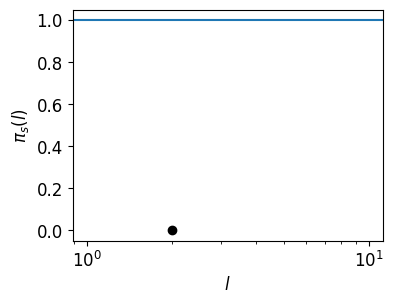

In [15]:
L = 200
probs = [0.5, 0.5]
probs/= np.sum(probs)
lambdas = np.array([0.01,150])

colors = plt.cm.plasma(np.linspace(0,1,6+2))



ps_composite = get_ps_composite_cutoff(L, lambdas = lambdas, probs = probs, Lmax = 100)

    
_, ax = plt.subplots()
ax.plot(np.arange(2, L+1), ps_composite[1:], '-o', c = 'k')

plt.setp(ax, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
         xscale = 'log') ;  
ax.axhline(1)

# Simulating walks from $P_s$
We will simulate the walk of an agent with policy $P_s$ such as to have a power law $P(L)$. This should translate into superdiffusive walks. From [Zaburdaev's review](https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.87.483), we should have a walk following:
$$
  \left <x^2(t)\right> \propto
    \begin{cases}
      t^2 & 0 < \alpha < 1, \\ t^2/\ln t & \alpha = 1, \\ t^{3-\alpha} & 1<\alpha <2, \\
      t\ln t & \alpha = 2 \\ t & \alpha > 2
    \end{cases}       
$$

In [4]:
#| export
def walk_from_policy(T, policy, return_steps = False):
    '''Inputs:
    :T (int): Number of steps
    :policy (array): probability of staying in same direction at each time. If at some point
                     time > len(policy), the agent will rotate.
                     
     Ps(1) = 1 IS ALREADY CONSIDERED, DON'T INPUT IT!!!'''
    
    pos = np.zeros((T, 2))    
    direction = np.random.rand()*360 
    internal_clock = 0
    steps = []
    for t in range(1, T):   
        pos[t, 0] = pos[t-1, 0] + np.cos(direction)
        pos[t, 1] = pos[t-1, 1] + np.sin(direction)
        
        if np.random.rand() > policy[internal_clock]:
            steps.append(internal_clock)
            internal_clock = 0
            direction = np.random.rand()*360 
        else:
            internal_clock += 1
            
    if return_steps:
        return pos, steps
    else:
        return pos  

In [ ]:
T = 1000; N = 100
alphas = np.linspace(0, 2, 100)

msd = np.zeros((len(alphas), 2*N, T))
for idxa, alpha in enumerate(tqdm(alphas)):

    ps = get_ps(L = T, alpha = alpha)
    
    for idx in (range(100)):
        pos = walk_from_policy(T = T, policy = ps[1:])

        msd[idxa, idx, :] = pos[:, 0]
        msd[idxa, 2*idx, :] = pos[:, 1]
    
#     exp = np.mean([msd_analysis().get_exponent(pos[:,0]), msd_analysis().get_exponent(pos[:,1])])
#     exponent.append(exp)

  0%|          | 0/100 [00:00<?, ?it/s]

<matplotlib.legend.Legend>

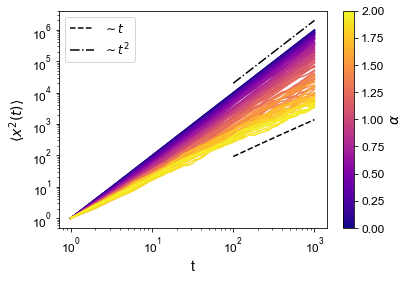

In [ ]:
colors = plt.cm.plasma(np.linspace(0,1,len(alphas)+2))
fig, ax = plt.subplots()

for m, c in zip(msd, colors):
    m = (m.copy()**2).mean(0)
    ax.loglog(np.arange(1, T), m[1:]/m[1], c = c)
init = 100
ax.plot(np.arange(init, T), 0.2*np.arange(init, T)*np.log(np.arange(init, T)), '--', c = 'k', label = r'$\sim t$')
ax.plot(np.arange(init, T), 2*np.arange(init, T)**2, '-.', c = 'k', label = r'$\sim t^2$')
add_colorbar(alphas, ax, r'$\alpha$')
plt.setp(ax, xlabel = 't', ylabel = r'$\left < x^2 (t) \right >$')
ax.legend()

[<matplotlib.lines.Line2D>]

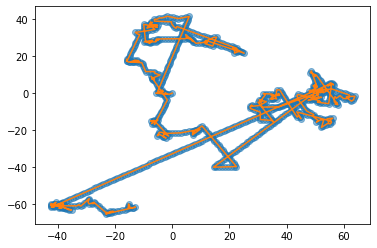

In [ ]:
plt.plot(pos[:,0], pos[:, 1], 'o', alpha = 0.5)
plt.plot(pos[:,0], pos[:, 1])


#### Figure draft

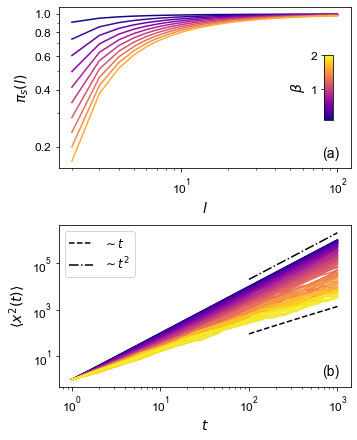

In [ ]:
fig, [ax_p, ax_m] = plt.subplots(2, 1, figsize = (3*1.618, 6), constrained_layout = True)

###### Optimal pi_s
L = 100
alphas_ps = np.linspace(0.1, 2, 10)
colors = plt.cm.plasma(np.linspace(0,1,len(alphas_ps)+2))

for alpha, color in zip(alphas_ps, colors):
    ps = get_ps(L, alpha = alpha, ps_0 = 1)
    ax_p.loglog(np.arange(2, L+1), ps[1:], c = color)
plt.setp(ax_p, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
         yticks = np.round(np.arange(0.2, 1.01, 0.2),1),
         yticklabels = np.round(np.arange(0.2, 1.01, 0.2),1).astype(str))

from matplotlib.ticker import ScalarFormatter, NullFormatter
ax_p.yaxis.set_minor_formatter(NullFormatter())

####### MSD
alphas_msd = np.linspace(0, 2, 100)
colors = plt.cm.plasma(np.linspace(0,1,len(alphas_msd)+2))
for m, c in zip(msd, colors):
    m = (m.copy()**2).mean(0)
    ax_m.loglog(np.arange(1, T), m[1:]/m[1], c = c)
init = 100
ax_m.plot(np.arange(init, T), 0.2*np.arange(init, T)*np.log(np.arange(init, T)), '--', c = 'k', label = r'$\sim t$')
ax_m.plot(np.arange(init, T), 2*np.arange(init, T)**2, '-.', c = 'k', label = r'$\sim t^2$')

plt.setp(ax_m, xlabel = r'$t$', ylabel = r'$\left < x^2 (t) \right >$')
ax_m.legend()


####### colorbar
ax_c = ax_p.inset_axes([0.91,0.3,0.03,0.4])
vec = alphas_ps
scalarmappaple = plt.cm.ScalarMappable(norm=mcolors.Normalize(vmin=vec.min(), vmax=vec.max()), 
                                       cmap=plt.cm.plasma)
scalarmappaple.set_array(vec)
cbar = fig.colorbar(scalarmappaple, cax = ax_c)
cbar.set_label(r'$\beta$')
ax_c.yaxis.set_ticks_position('left')
ax_c.yaxis.set_label_position('left')

##### labels
for ax, let in zip([ax_p, ax_m], 'ab'):
    ax.annotate('('+let+')', (0.96, 0.05), c = 'k', xycoords = 'axes fraction', va = 'bottom', ha = 'right', fontsize = 14)
    
plt.savefig('../figures/pi_s_and_msd.pdf', transparent = True)

In [ ]:
'('+let+')'

'(a)'

In [ ]:
 
scalarmappaple = plt.cm.ScalarMappable(norm=mcolors.Normalize(vmin=vec.min(), vmax=vec.max()), 
                                       cmap=plt.cm.plasma)
scalarmappaple.set_array(vec)
cbar = fig.colorbar(scalarmappaple, ax = ax)
cbar.set_label(label)

In [ ]:
N = 100; Nt = 50; T = 5; L = 100; at = 10; ls = 1
t = 0
pos = np.random.rand(N, T, 2)*L
traps_pos = np.random.rand(Nt, T, 2)*L
dist = models_phenom()._get_distance(np.vstack((traps_pos[:, t, :], pos[:, t, :])))[Nt:, :Nt]
idx_close = np.argwhere(dist < at).
angles = np.random.uniform(low = 0, high = 2*np.pi, size = idx_close.shape[0])
pos[idx_close[:, 0], t, :] = traps_pos[idx_close[:, 1], t, :] + np.vstack((ls*np.cos(angles),ls*np.sin(angles))).transpose()

# Simulating learning
We will simulate the learning of an agent exploring a target environment. For a given environment, we set the optimal $\alpha$. To begin we consider $\alpha\rightarrow 2$. Then, the targets must be collected at the end of the steps sampled from this distribution. We reward this sequence of steps (consider $\eta$ glow, a.k.a. discount factor).

In [5]:
#| export
class simul_ps():
    def __init__(self, num_states, eta, gamma):     
        
        self.num_states = num_states
    
        self.h_matrix = np.ones(num_states)        
        self.eta = eta
        self.gamma_damping = gamma
        
        self.g_matrix = np.zeros(num_states)
    
    def reward(self, state, reward = 1):
        
        # updating the g-matrix
        self.g_matrix[:state] += 1        
        self.g_matrix[:state] = (self.eta**np.arange(state))[::-1]
        
        
        self.h_matrix =  self.h_matrix - self.gamma_damping * (self.h_matrix - 1.) + self.g_matrix*reward
        
        
        
        

In [28]:
#| export
class simul_2actions():
    def __init__(self, num_states, eta, gamma):     
        
        self.num_states = num_states
    
        self.h_matrix = np.ones((2, self.num_states)).astype(float)
        self.eta = eta
        self.gamma_damping = gamma
        
        self.reset()
        
    def reset(self):
        self.g_matrix = np.zeros((2, self.num_states)).astype(float)
        
    
#     def reward(self, state, reward = 1):
        
#         # updating the STAY part of g-matrix
#         # set to one all previous states
#         self.g_matrix[0, :state+1] += 1   
#         # multiply by eta**x all previous states
#         self.g_matrix[0, :state+1] *= (self.eta**np.arange(state+1))[::-1]
#         # multiply the rest of the matrix by number of steps don
#         self.g_matrix[0, state+1:] *= self.eta**state
        
#         # updating the ROTATE part of g-matrix
#         self.g_matrix[1, :] *= self.eta**state
#         self.g_matrix[1, state] = +1
        
#         for _ in range(state):
#             self.h_matrix -= self.gamma_damping*(self.h_matrix - 1.)
        
#         self.h_matrix += self.g_matrix*reward
        
        
        
    def reward(self, length, reward = 1):
            #NOTE: state is length-1 because counter starts in 0 
            #(but in 0, agent has already performed a step of length 1 -- from the previous action "rotate").

            factor = 1 - self.eta
            # updating the STAY part of g-matrix
            # damping before adding up the traversed edges.
            self.g_matrix[0, :length-1] *= (factor**np.arange(1,length))
            # set to one all previous states (adding up the traversed edges)
            self.g_matrix[0, :length-1] += 1   
            # multiply by eta**x all previous states
            self.g_matrix[0, :length-1] *= (factor**np.arange(1,length))[::-1]
            # multiply the rest of the matrix by number of steps don
            self.g_matrix[0, length-1:] *= factor**length

            # updating the ROTATE part of g-matrix
            self.g_matrix[1, :] *= factor**length
            self.g_matrix[1, length-1] += 1
            
            if self.gamma_damping > 0:
                for _ in range(length):
                    self.h_matrix -= self.gamma_damping*(self.h_matrix - 1.)

            self.h_matrix += self.g_matrix*reward

In [19]:
#| export
def discrete_pw_sample(alpha, L_max=1000, num_samples = 1):
    probs = (1/zeta(alpha+1, q = 1))*(np.arange(1, L_max).astype(float)**(-alpha-1))
    # normalize to take into accont L_max not infinity
    probs /= np.sum(probs)
    return np.random.choice(np.arange(1, L_max), p = probs, size = num_samples)

In [8]:
samples = discrete_pw_sample(2, num_samples=int(1e6))

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


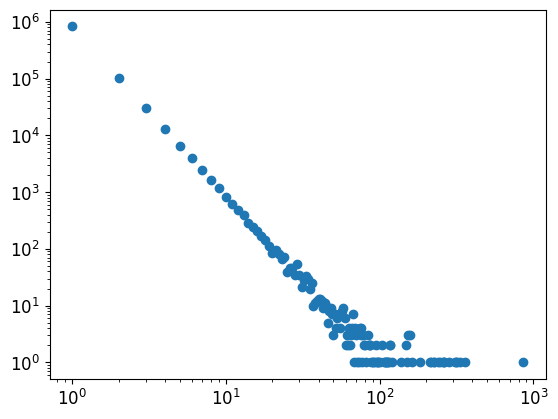

In [9]:
u, c = np.unique(samples, return_counts=True)
plt.loglog(u, c, 'o')
# plt.loglog(np.arange(1,L), probs)

## Testing convergence to small $\beta$

In [ ]:
Ls = [int(1e3)]#np.linspace(50, 1000, 10)
num_states = 1000

epochs = int(1e3); steps = int(1e3)
gammas = np.logspace(-2, -7, 10)
hmatrix_a = np.zeros((len(gammas), epochs, 2, num_states))

for idxa, gamma in enumerate(tqdm(gammas)):
    
    ps = simul_2actions(num_states = num_states,
                        eta = int(1e-7),
                        gamma = gamma)
    step = []
    for e in tqdm(range(epochs)):

        ps.reset()

        for s in range(steps):    
            step.append(int(discrete_pw_sample(alpha, L_max = num_states)))
            ps.reward(length = step[-1])
        hmatrix_a[idxa, e] = ps.h_matrix

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

<matplotlib.legend.Legend>

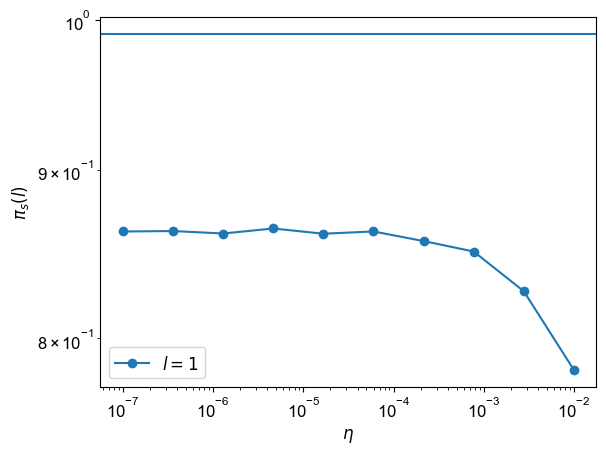

In [ ]:
plt.loglog(etas, hmatrix_a[:,-1,0,0]/hmatrix_a[:,-1,:,0].sum(1),'o-', label = r'$l=1$')
#plt.plot(Ls, hmatrix_a[:,-1,0,1]/hmatrix_a[:,-1,:,1].sum(1),'o-', label = r'$l=2$')
plt.axhline(theory[1])
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\pi_s(l)$')
plt.legend()

<matplotlib.legend.Legend>

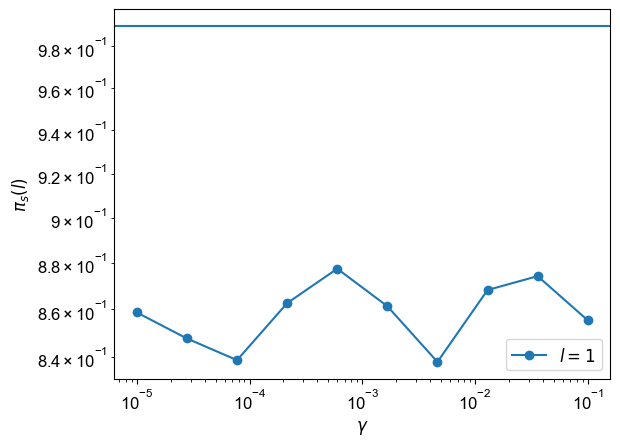

In [ ]:
plt.loglog(gammas, hmatrix_a[:,-1,0,0]/hmatrix_a[:,-1,:,0].sum(1),'o-', label = r'$l=1$')
#plt.plot(Ls, hmatrix_a[:,-1,0,1]/hmatrix_a[:,-1,:,1].sum(1),'o-', label = r'$l=2$')
plt.axhline(theory[1])
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$\pi_s(l)$')
plt.legend()

### Effect of number of states ($L_{max}$)
$L_{max}$ here is the maximum $L$ that we sample from $P(L)$

<matplotlib.legend.Legend>

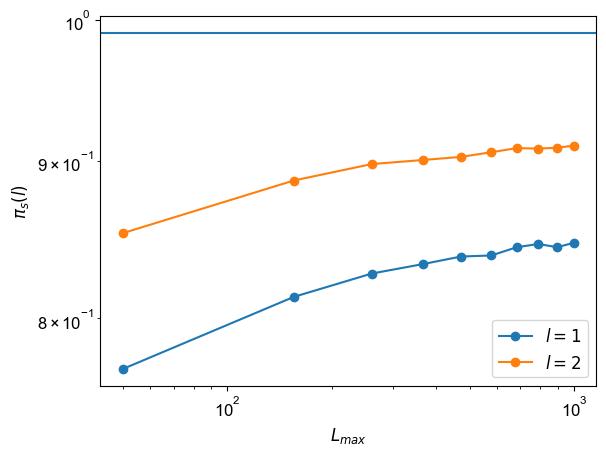

In [ ]:
plt.loglog(Ls, hmatrix_a[:,-1,0,0]/hmatrix_a[:,-1,:,0].sum(1),'o-', label = r'$l=1$')
plt.plot(Ls, hmatrix_a[:,-1,0,1]/hmatrix_a[:,-1,:,1].sum(1),'o-', label = r'$l=2$')
plt.axhline(theory[1])
plt.xlabel(r'$L_{max}$')
plt.ylabel(r'$\pi_s(l)$')
plt.legend()

<matplotlib.legend.Legend>

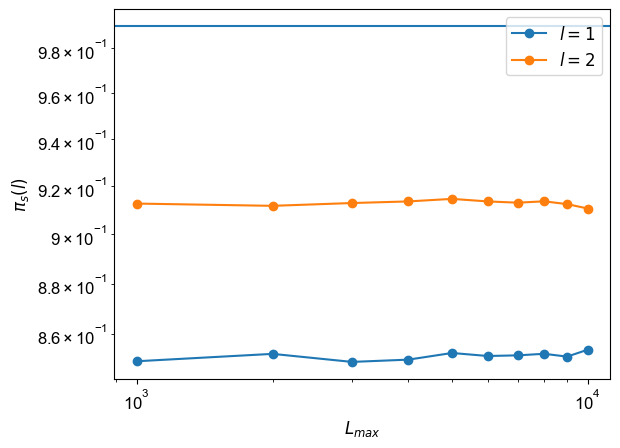

In [ ]:
plt.loglog(Ls, hmatrix_a[:,-1,0,0]/hmatrix_a[:,-1,:,0].sum(1),'o-', label = r'$l=1$')
plt.plot(Ls, hmatrix_a[:,-1,0,1]/hmatrix_a[:,-1,:,1].sum(1),'o-', label = r'$l=2$')
plt.axhline(theory[1])
plt.xlabel(r'$L_{max}$')
plt.ylabel(r'$\pi_s(l)$')
plt.legend()

''

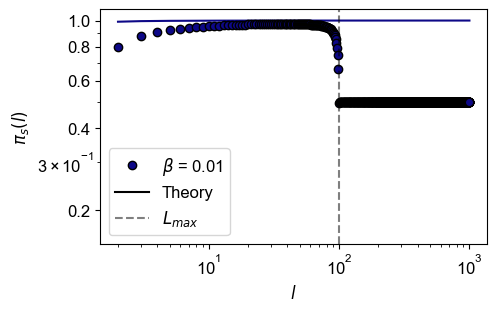

In [ ]:
fig, ax = plt.subplots(figsize = (3*1.618, 3), constrained_layout = True)
for idx, (h, alpha) in enumerate(zip(hmatrix_a.copy(), alphas)):
    if idx == 0: label = 'Theory'
    else: label = ''
    
    #theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
    ax.loglog(np.arange(2, num_states+1), theory[1:], c = plt.cm.plasma((alpha-0.2)/2))
    h = h[-1]
    ax.plot(np.arange(2, num_states+2), h[0,:]/h.sum(0), 'o', c = plt.cm.plasma((alpha-0.2)/2),  label = fr'$\beta$ = {alpha}', alpha = 1, markeredgecolor='k')
    #theoretical
    
ax.plot(10, 10, label = 'Theory', c = 'k') 
ax.axvline(100, ls = '--', c = 'k', alpha = 0.5, label = r'$L_{max}$')

# plt.setp(ax, xscale = 'log',
#          xlabel =r'$l$', ylabel = r'$\pi_s(l)$',)
ax.legend()
# ax.xscale('log')
# plt.yscale('log')
#ax.set_xlim(1.8, 20)
ax.set_ylim(0.15, 1.1)

plt.setp(ax, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
         yticks = np.round(np.arange(0.2, 1.01, 0.2),1),
         yticklabels = np.round(np.arange(0.2, 1.01, 0.2),1).astype(str),
        )

;

''

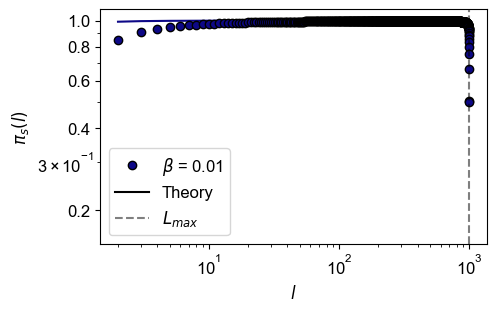

In [ ]:
fig, ax = plt.subplots(figsize = (3*1.618, 3), constrained_layout = True)
for idx, (h, alpha) in enumerate(zip(hmatrix_a.copy(), alphas)):
    if idx == 0: label = 'Theory'
    else: label = ''
    
    #theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
    ax.loglog(np.arange(2, num_states+1), theory[1:], c = plt.cm.plasma((alpha-0.2)/2))
    h = h[-1]
    ax.plot(np.arange(2, num_states+2), h[0,:]/h.sum(0), 'o', c = plt.cm.plasma((alpha-0.2)/2),  label = fr'$\beta$ = {alpha}', alpha = 1, markeredgecolor='k')
    #theoretical
    
ax.plot(10, 10, label = 'Theory', c = 'k') 
ax.axvline(1000, ls = '--', c = 'k', alpha = 0.5, label = r'$L_{max}$')

# plt.setp(ax, xscale = 'log',
#          xlabel =r'$l$', ylabel = r'$\pi_s(l)$',)
ax.legend()
# ax.xscale('log')
# plt.yscale('log')
#ax.set_xlim(1.8, 20)
ax.set_ylim(0.15, 1.1)

plt.setp(ax, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
         yticks = np.round(np.arange(0.2, 1.01, 0.2),1),
         yticklabels = np.round(np.arange(0.2, 1.01, 0.2),1).astype(str),
        )

;

''

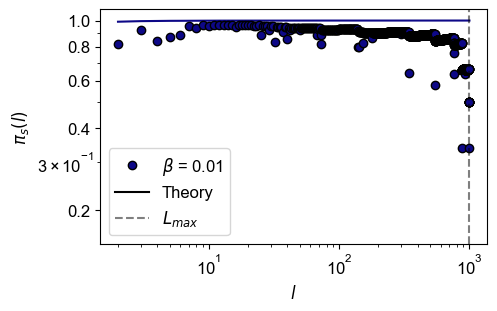

In [ ]:
fig, ax = plt.subplots(figsize = (3*1.618, 3), constrained_layout = True)
for idx, (h, alpha) in enumerate(zip(hmatrix_a.copy(), alphas)):
    if idx == 0: label = 'Theory'
    else: label = ''
    
    #theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
    ax.loglog(np.arange(2, num_states+1), theory[1:], c = plt.cm.plasma((alpha-0.2)/2))
    h = h[-1]
    ax.plot(np.arange(2, num_states+2), h[0,:]/h.sum(0), 'o', c = plt.cm.plasma((alpha-0.2)/2),  label = fr'$\beta$ = {alpha}', alpha = 1, markeredgecolor='k')
    #theoretical
    
ax.plot(10, 10, label = 'Theory', c = 'k') 
ax.axvline(1000, ls = '--', c = 'k', alpha = 0.5, label = r'$L_{max}$')

# plt.setp(ax, xscale = 'log',
#          xlabel =r'$l$', ylabel = r'$\pi_s(l)$',)
ax.legend()
# ax.xscale('log')
# plt.yscale('log')
#ax.set_xlim(1.8, 20)
ax.set_ylim(0.15, 1.1)

plt.setp(ax, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
         yticks = np.round(np.arange(0.2, 1.01, 0.2),1),
         yticklabels = np.round(np.arange(0.2, 1.01, 0.2),1).astype(str),
        )

;

''

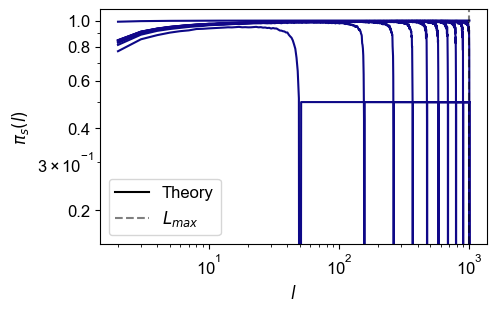

In [ ]:
fig, ax = plt.subplots(figsize = (3*1.618, 3), constrained_layout = True)
theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
ax.loglog(np.arange(2, num_states+1), theory[1:], c = plt.cm.plasma((alpha-0.2)/2))

for idx, (h, L) in enumerate(zip(hmatrix_a.copy(), Ls)):
    if idx == 0: label = 'Theory'
    else: label = ''     
    
    h = h[-1]
    ax.plot(np.arange(2, num_states+2), h[0,:]/h.sum(0), '-', c = plt.cm.plasma(idx/Ls[-1]))#,  label = fr'$\beta$ = {alpha}', alpha = 1, markeredgecolor='k')
    #theoretical
    
ax.plot(10, 10, label = 'Theory', c = 'k') 
ax.axvline(1000, ls = '--', c = 'k', alpha = 0.5, label = r'$L_{max}$')

# plt.setp(ax, xscale = 'log',
#          xlabel =r'$l$', ylabel = r'$\pi_s(l)$',)
ax.legend()
# ax.xscale('log')
# plt.yscale('log')
#ax.set_xlim(1.8, 20)
ax.set_ylim(0.15, 1.1)

plt.setp(ax, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
         yticks = np.round(np.arange(0.2, 1.01, 0.2),1),
         yticklabels = np.round(np.arange(0.2, 1.01, 0.2),1).astype(str),
        )

;

## Power law

### $\alpha = 1$ ($\gamma = 0$, $\eta = 0.001$)

(1.4657496244162596, 200)

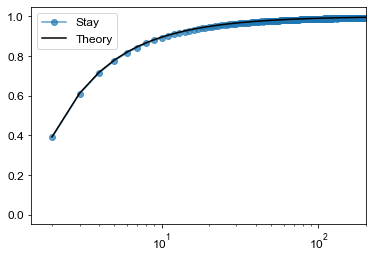

In [ ]:
# plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[1,:]/ps.h_matrix.sum(0), '-o', label = 'Rotare')
plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[0,:]/ps.h_matrix.sum(0), '-o', label = 'Stay', alpha = 0.7)
#theoretical
theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
plt.plot(np.arange(2, ps.num_states+1), theory[1:], c = 'k', label = 'Theory')

plt.legend()
plt.xscale('log')
plt.xlim(xmax = 200)

### $\alpha = 2$ ($\gamma = 0$, $\eta = 0.001$)

(1.4657496244162596, 200)

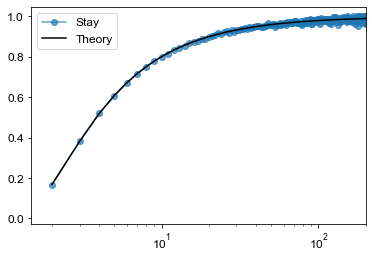

In [ ]:
# plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[1,:]/ps.h_matrix.sum(0), '-o', label = 'Rotare')
plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[0,:]/ps.h_matrix.sum(0), '-o', label = 'Stay', alpha = 0.7)
#theoretical
theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
plt.plot(np.arange(2, ps.num_states+1), theory[1:], c = 'k', label = 'Theory')

plt.legend()
plt.xscale('log')
plt.xlim(xmax = 200)

### Failed statistics

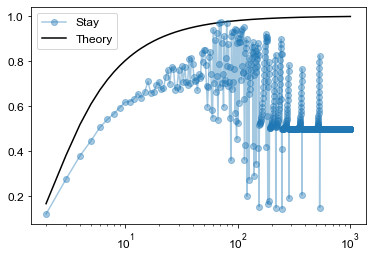

In [ ]:
# plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[1,:]/ps.h_matrix.sum(0), '-o', label = 'Rotare')
plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[0,:]/ps.h_matrix.sum(0), '-o', label = 'Stay', alpha = 0.4)
#theoretical
theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
plt.plot(np.arange(2, ps.num_states+1), theory[1:], c = 'k', zorder = -1, label = 'Theory')

plt.legend()
plt.xscale('log')

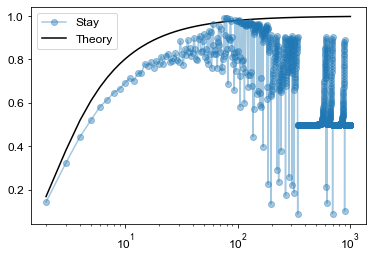

In [ ]:
# plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[1,:]/ps.h_matrix.sum(0), '-o', label = 'Rotare')
plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[0,:]/ps.h_matrix.sum(0), '-o', label = 'Stay', alpha = 0.4)
#theoretical
theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
plt.plot(np.arange(2, ps.num_states+1), theory[1:], c = 'k', zorder = -1, label = 'Theory')

plt.legend()
plt.xscale('log')

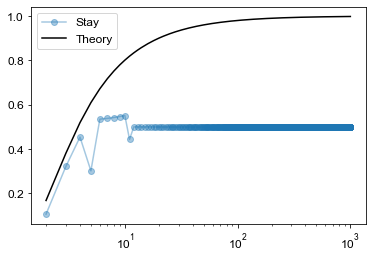

In [ ]:
# plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[1,:]/ps.h_matrix.sum(0), '-o', label = 'Rotare')
plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[0,:]/ps.h_matrix.sum(0), '-o', label = 'Stay', alpha = 0.4)
#theoretical
theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
plt.plot(np.arange(2, ps.num_states+1), theory[1:], c = 'k', zorder = -1, label = 'Theory')

plt.legend()
plt.xscale('log')

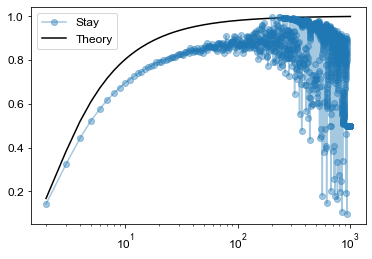

In [ ]:
# plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[1,:]/ps.h_matrix.sum(0), '-o', label = 'Rotare')
plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[0,:]/ps.h_matrix.sum(0), '-o', label = 'Stay', alpha = 0.4)
#theoretical
theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
plt.plot(np.arange(2, ps.num_states+1), theory[1:], c = 'k', zorder = -1, label = 'Theory')

plt.legend()
plt.xscale('log')

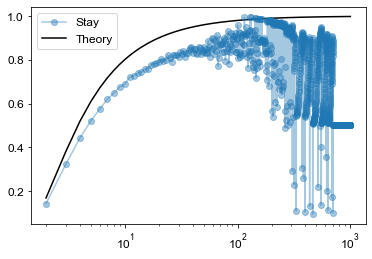

In [ ]:
# plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[1,:]/ps.h_matrix.sum(0), '-o', label = 'Rotare')
plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[0,:]/ps.h_matrix.sum(0), '-o', label = 'Stay', alpha = 0.4)
#theoretical
theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
plt.plot(np.arange(2, ps.num_states+1), theory[1:], c = 'k', zorder = -1, label = 'Theory')

plt.legend()
plt.xscale('log')

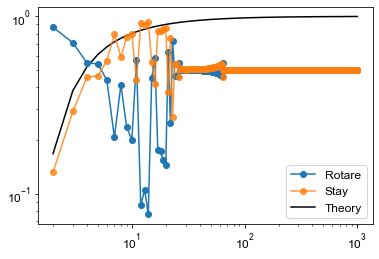

In [ ]:
plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[1,:]/ps.h_matrix.sum(0), '-o', label = 'Rotare')
plt.plot(np.arange(2, ps.num_states+2), ps.h_matrix[0,:]/ps.h_matrix.sum(0), '-o', label = 'Stay', alpha = 0.8)
#theoretical
theory = get_ps(ps.num_states, alpha = alpha, ps_0 = 1)
plt.loglog(np.arange(2, ps.num_states+1), theory[1:], c = 'k', zorder = -1, label = 'Theory')

plt.legend()
plt.xscale('log')

### Figure draft

In [8]:
Ls = [int(1e3)]#np.linspace(50, 1000, 10)
num_states = 1000

epochs = int(1e3); num_steps = int(1e3);

epochs = int(1e3); steps = int(1e3)
betas = [0.5, 1, 1.5, 2]
hmatrix_a = np.zeros((len(betas), 2, num_states))

for idxb, beta in enumerate(tqdm(betas)):
    
    ps = simul_2actions(num_states = num_states,
                        eta = int(1e-7),
                        gamma = 0)
    
    steps = discrete_pw_sample(beta, L_max = num_states, num_samples = int(epochs*num_steps))
    steps = steps.reshape(epochs, num_steps)
                               
    for e in tqdm(range(epochs)):
        ps.reset()
        for s in steps[e]:    
            ps.reward(length = s)
            
    hmatrix_a[idxb] = ps.h_matrix

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [55]:
plt.cm.plasma((beta-0.2)/2)

(0.988648, 0.809579, 0.145357, 1.0)

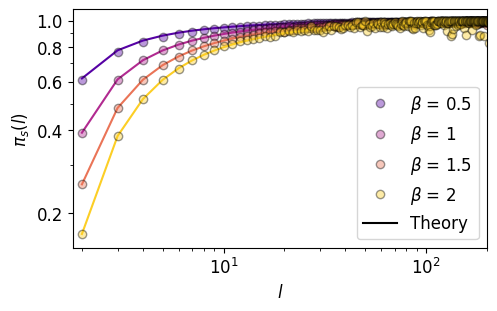

In [17]:
fig, ax = plt.subplots(figsize = (3*1.618, 3), constrained_layout = True)
for idx, (h, beta) in enumerate(zip(hmatrix_a, betas)):
    if idx == 0: label = 'Theory'
    else: label = ''
    
    theory = get_ps(ps.num_states, alpha = beta, ps_0 = 1)
    ax.loglog(np.arange(2, num_states+1), theory[1:], c = plt.cm.plasma((beta-0.2)/2))
    ax.plot(np.arange(2, num_states+2), h[0,:]/h.sum(0), 'o', c = plt.cm.plasma((beta-0.2)/2),  label = fr'$\beta$ = {beta}', alpha = 0.4, markeredgecolor='k')
    #theoretical
    
ax.plot(10, 10, label = 'Theory', c = 'k')   

# plt.setp(ax, xscale = 'log',
#          xlabel =r'$l$', ylabel = r'$\pi_s(l)$',)
ax.legend()
# ax.xscale('log')
# plt.yscale('log')
ax.set_xlim(1.8, 200)
ax.set_ylim(0.15, 1.1)

plt.setp(ax, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
         yticks = np.round(np.arange(0.2, 1.01, 0.2),1),
         yticklabels = np.round(np.arange(0.2, 1.01, 0.2),1).astype(str))

from matplotlib.ticker import ScalarFormatter, NullFormatter
ax.yaxis.set_minor_formatter(NullFormatter())
# fig.savefig('../figures/pi_s_theory_training.pdf', transparent = True)

## Power law + cutoff
It seems that for small $\beta$ it is hard to get a convergence to the theoretical policy. Let's see how this works with

In [14]:
def pw_exp_sample(alpha, xi, Lmax, num_samples = 1):
    Ls = np.arange(1, Lmax).astype(float)
    probs = pw_exp(Ls, alpha = alpha, xi = xi)
    return np.random.choice(Ls, p = probs/np.sum(probs), size = num_samples)
    

In [17]:
Ls = int(1e3)
num_states = 1000

alpha = 0.01
xis = np.logspace(-2, -7, 5)


epochs = int(1e3); num_steps = int(1e3)

hmatrix_xi = np.zeros((len(xis), 2, num_states))

for idx_xi, xi in enumerate(tqdm(xis)):
    
    ps = simul_2actions(num_states = num_states,
                        eta = 0.1,
                        gamma = 1e-7)
    
    for e in tqdm(range(epochs)):

        ps.reset()
        
        steps = pw_exp_sample(alpha, xi, Lmax = num_states, num_samples=num_steps)
        for s in steps.astype(int):    
            ps.reward(length = s)
    hmatrix_xi[idx_xi] = ps.h_matrix.copy()

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

### $\beta = 0.01$ ($\gamma = 10^{-7}$, $\eta = 0.1$)

''

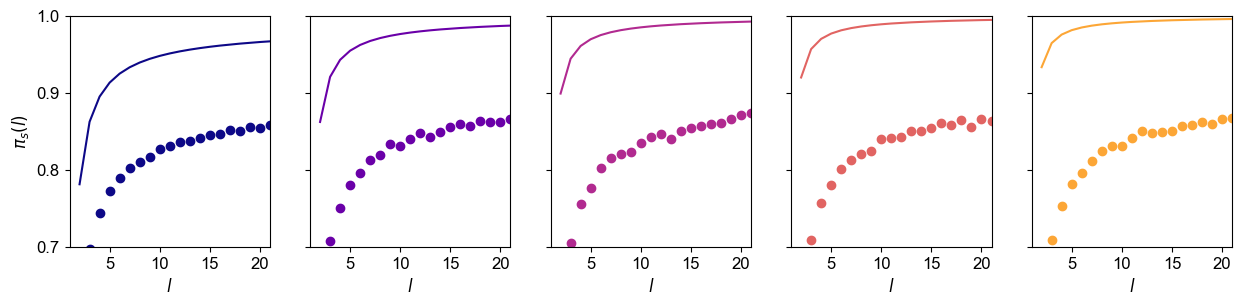

In [ ]:
colors = plt.cm.plasma(np.linspace(0,1,len(xis)+1))

fig, axs = plt.subplots(1, len(xis), figsize = (3*len(xis), 3))
ps_theory = np.zeros((len(xis), num_states))
for idx, (xi, h, color, ax) in enumerate(zip(xis, hmatrix_xi, colors, axs)):
    
    ps_theory[idx, :] = ps_exp_cutoff(num_states, alpha = alpha, xi = xi, ps_0 = 1)     
    ax.plot(np.arange(2, num_states+1), ps_theory[idx, 1:], c = color)
    
    ax.plot(np.arange(2, num_states+2), h[0,:]/h.sum(0), 'o', c = color)
    
plt.setp(axs, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', ylim = (0.7, 1.), xlim = (1, 21))
plt.setp(axs[1:], ylabel = '', yticklabels = [])
# from matplotlib.ticker import ScalarFormatter, NullFormatter
# ax.yaxis.set_minor_formatter(NullFormatter())


# add_colorbar(xis, ax, r'$\xi$')
;

### $\beta = 0.01$ ($\gamma = 0$, $\eta = 10^{-7}$)

''

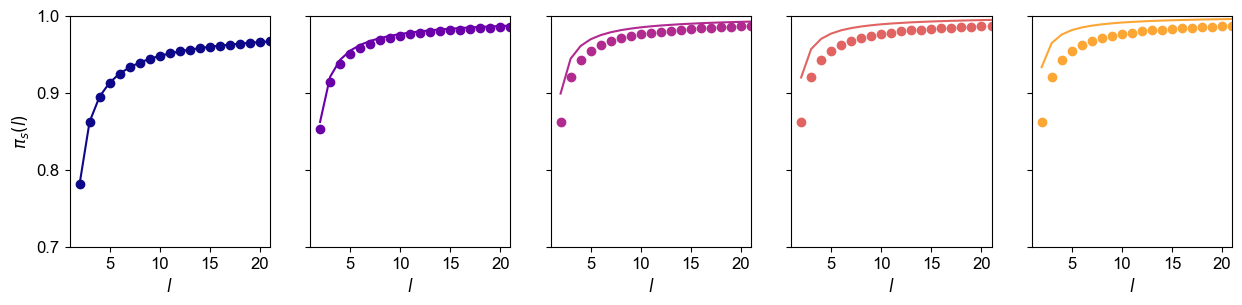

In [ ]:
colors = plt.cm.plasma(np.linspace(0,1,len(xis)+1))

fig, axs = plt.subplots(1, len(xis), figsize = (3*len(xis), 3))
# ps_theory = np.zeros((len(xis), num_states))
for idx, (xi, h, color, ax) in enumerate(zip(xis, hmatrix_xi, colors, axs)):
    
    # ps_theory[idx, :] = ps_exp_cutoff(num_states, alpha = alpha, xi = xi, ps_0 = 1)     
    ax.plot(np.arange(2, num_states+1), ps_theory[idx, 1:], c = color)
    
    ax.plot(np.arange(2, num_states+2), h[0,:]/h.sum(0), 'o', c = color)
    
plt.setp(axs, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', ylim = (0.7, 1.), xlim = (1, 21))
plt.setp(axs[1:], ylabel = '', yticklabels = [])
# from matplotlib.ticker import ScalarFormatter, NullFormatter
# ax.yaxis.set_minor_formatter(NullFormatter())


# add_colorbar(xis, ax, r'$\xi$')
;

## Truncated $\pi_s(L)$

We will first get $\pi_s$ and then truncate it to see what distribution we find and which diffusion exponent we get

In [ ]:
L = 1000; alpha = 0.5
ps = get_ps(L, alpha = alpha, ps_0 = 1)

In [ ]:
L_trunc = 100; xi = 0.001
trunc = np.ones_like(ps)
trunc[L_trunc:] = np.exp(-xi*np.arange(L- L_trunc))

[<matplotlib.lines.Line2D>]

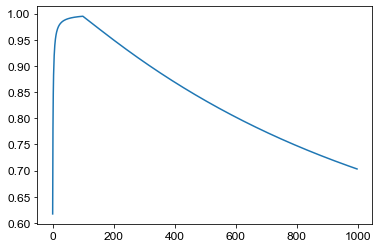

In [ ]:
truncated_policy = ps*(trunc/2+0.5)
plt.plot(truncated_policy[1:])

In [ ]:
T = int(1e5); N = 100

msd = np.zeros((2*N, T))
steps = []
    
for idx in tqdm(range(N)):
    pos, st = walk_from_policy(T = T, policy = truncated_policy[1:], return_steps = True)
    
    steps += st
    msd[idx, :] = pos[:, 0]
    msd[2*idx, :] = pos[:, 1]

  0%|          | 0/100 [00:00<?, ?it/s]

[<matplotlib.lines.Line2D>]

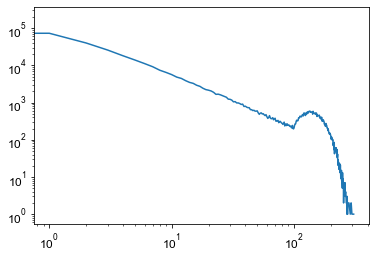

In [ ]:
unique, counts = np.unique(steps, return_counts=True)
plt.loglog(unique, counts)

<matplotlib.lines.Line2D>

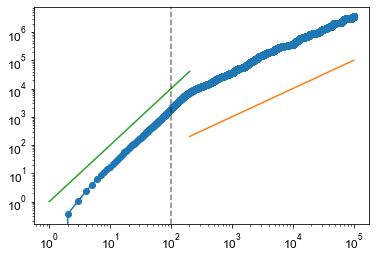

In [ ]:
time = np.arange(1, T+1); init = 200
plt.loglog(time, (msd**2).mean(0), '-o')
plt.loglog(time[init:], time[init:])
plt.loglog(time[:init], time[:init]**2)
plt.axvline(L_trunc, c = 'k', ls = '--', alpha = 0.5)

## Bi-exponential

### Sweep over $w_1$

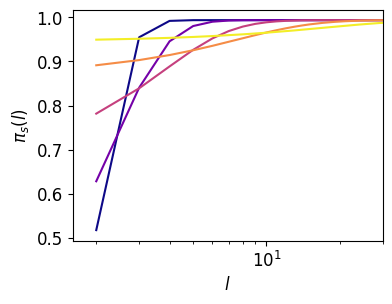

In [102]:
L = 1000
probs = [0.5, 0.5]
probs/= np.sum(probs)
_, ax = plt.subplots()


lambdas_1 = np.logspace(-.5, 1, 5)

for idx, lambda_1 in enumerate(lambdas_1):
    lambdas = np.array([lambda_1,150])

    ps_composite = get_ps_composite(L, lambdas = lambdas, probs = probs)

    ax.plot(np.arange(2, L+1), ps_composite[1:], '-', c = plt.cm.plasma((idx-0.1)/4))

plt.setp(ax, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
         xscale = 'log', xlim = (1.6, 30)) ;  
# ax.axhline(1, c = 'k')

### Effect of cutoff

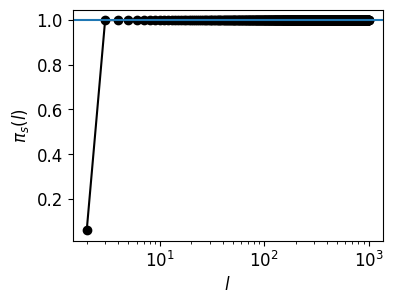

In [16]:
L = 1000
probs = [0.5, 0.5]
probs/= np.sum(probs)
lambdas = np.array([0.01,150])

probs = np.array([0.94, 0.06])
lambdas = np.array([0.06, 50413])

ps_composite = get_ps_composite(L, lambdas = lambdas, probs = probs)

    
_, ax = plt.subplots()
ax.plot(np.arange(2, L+1), ps_composite[1:], '-o', c = 'k')

plt.setp(ax, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
         xscale = 'log') ;  
ax.axhline(1)

In [18]:
list(range(10,100,10))

[10, 20, 30, 40, 50, 60, 70, 80, 90]

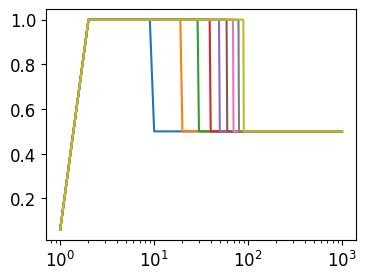

In [19]:
for L_trunc in range(10,100,10):
    trunc = np.ones_like(ps_composite)
    trunc[L_trunc:] = 0

    truncated_policy = ps_composite*(trunc/2+0.5)
    plt.plot(np.arange(1,L), truncated_policy[1:])
plt.xscale('log')

In [67]:
T = int(1e5); N = 1000

msd = np.zeros((2*N, T))
steps = []
    
for idx in tqdm(range(N)):
    pos, st = walk_from_policy(T = T, policy = truncated_policy[1:], return_steps = True)
    
    steps += st
    msd[idx, :] = pos[:, 0]
    msd[2*idx, :] = pos[:, 1]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [49]:
# This calculates the P(L) from the policy directly
probL = np.zeros(L)
for i_length, l in enumerate(range(1,L+1)):
    probL[i_length] = np.prod(np.append(truncated_policy[:l-1], 1-truncated_policy[l-1]))

(0.7079812002696424, 200)

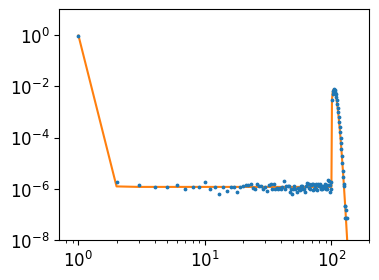

In [69]:
unique, counts = np.unique(steps, return_counts=True)
plt.scatter(unique+1, counts/np.sum(counts), s = 3)
plt.loglog(np.arange(1,L), probL[1:], c = 'C1', zorder = -1)
plt.ylim(1e-8, 10)
plt.xlim(xmax = 200)

### Performing fake training

#### Sweep over $w_1$

In [119]:
num_states = int(1e4)
epochs = int(1e3); num_steps = int(1e3)

probs = np.array([0.94, 0.06])
lambdas = np.array([0.6, 5000])

lambdas_1 = np.logspace(-.5, 1, 5)
hmatrix_a = np.zeros((len(lambdas_1), num_states))

for idx_l, lambda_1 in enumerate(tqdm(lambdas_1)):
    
    ps = simul_2actions(num_states = num_states,
                    eta = int(1e-7),
                    gamma = 0)
    
    lambdas[0] = lambda_1
    steps = discrete_composite_sample(lambdas = lambdas,
                                      probs = probs, 
                                      L_max = num_states, num_samples = num_steps*epochs)
    steps = steps.reshape(epochs, num_steps)
    
    # Training
    for e in (range(epochs)):
        ps.reset()
        for s in steps[e]:         
            ps.reward(length = s)
    # Saving
    hmatrix_a[idx_l] = ps.h_matrix[0]/ps.h_matrix.sum(0)


  0%|          | 0/5 [00:00<?, ?it/s]

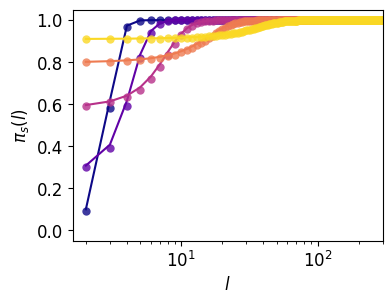

In [122]:
_, ax = plt.subplots()

for idx, (lambda_1, h) in enumerate(zip(lambdas_1, hmatrix_a)):
    
    lambdas[0] = lambda_1
    
    ps_composite = get_ps_composite(num_states, lambdas = lambdas, probs = probs)
    ax.plot(np.arange(2, num_states+1), ps_composite[1:], '-', c = plt.cm.plasma((idx-0.3)/4))
    
    ax.plot(np.arange(2, num_states+2), h, 'o', 
            c =  plt.cm.plasma((idx-0.3)/4),  label = fr'$w_1$ = {lambda_1}', alpha = 0.8, markeredgecolor='None')
    
    
# ax.legend()
plt.setp(ax, xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
         xscale = 'log', xlim = (1.6, 300)) ;  
# ax.axhline(1, c = 'k')

#### Drawing from uniform distribution

  0%|          | 0/5 [00:00<?, ?it/s]

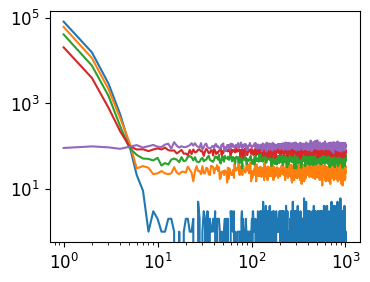

In [114]:
Ls = [int(1e3)]#np.linspace(50, 1000, 10)
num_states = 1000
epochs = int(1e3); num_steps = int(1e2)

probs = np.array([0.94, 0.06])
lambdas = np.array([0.6, 5000])
# Get theoretical policy
ps_composite = get_ps_composite(L = num_states, lambdas = lambdas, probs = probs)


# Setting a max step length
L_cutoff = num_states #int(500)

gamma = 0

## Adding some rewarded steps randomly sampled
fraction_random = np.linspace(0, 1, 5)



hmatrix_a = np.zeros((len(fraction_random), num_states))
for idx_frac, frac in enumerate(tqdm(fraction_random)):
    
    ps = simul_2actions(num_states = num_states,
                    eta = int(1e-7),
                    gamma = gamma)
    
    N_random = int(frac*num_steps*epochs)
    idx = np.random.choice(np.arange(num_steps*epochs), size = N_random, replace = False)
    
    steps = discrete_composite_sample(lambdas = lambdas, probs = probs, L_max = num_states, num_samples = num_steps*epochs)
    steps[idx] = np.random.randint(1, num_states, size = N_random)
    steps = steps.reshape(epochs, num_steps)
    
    c = np.bincount(steps.flatten())
    plt.loglog(np.arange(len(c)-1)+1, c[1:])

    # Training
    for e in (range(epochs)):
        ps.reset()
        for s in steps[e]:         
            ps.reward(length = s)
    # Saving
    hmatrix_a[idx_frac] = ps.h_matrix[0]/ps.h_matrix.sum(0)


(0.0, 1.001)

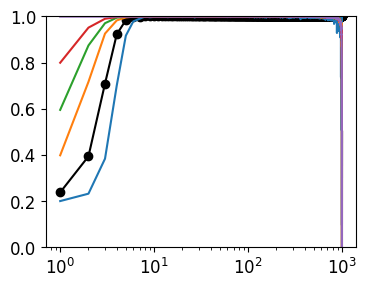

In [116]:
# h = hmatrix_a[-1].copy()
# h = h[0]/h.sum(0)
plt.plot(np.arange(1, num_states), ps_composite[1:], '-o', c = 'k')
plt.plot(np.arange(1, num_states+1), hmatrix_a.transpose())

plt.xscale('log')
# plt.yscale('log')

plt.ylim(0.0, 1.001)

(0.99, 1.001)

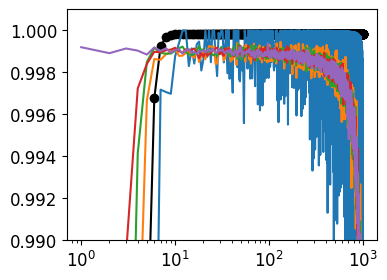

In [354]:
# h = hmatrix_a[-1].copy()
# h = h[0]/h.sum(0)
plt.plot(np.arange(1, num_states), ps_composite[1:], '-o', c = 'k')
plt.plot(np.arange(1, num_states+1), hmatrix_a.transpose())

plt.xscale('log')
# plt.yscale('log')

plt.ylim(0.99, 1.001)

#### Introducing cutoff

In [315]:
Ls = [int(1e3)]#np.linspace(50, 1000, 10)
num_states = int(1e4)
epochs = int(1e4); num_steps = int(1e2)

probs = np.array([0.94, 0.06])
lambdas = np.array([0.6, 5000])
# Get theoretical policy
ps_composite = get_ps_composite(L = num_states, lambdas = lambdas, probs = probs)


# Setting a max step length
L_cutoffs = np.logspace(-2.5, 0, 5) #int(500)

steps_og = discrete_composite_sample(lambdas = lambdas, probs = probs, L_max = num_states, num_samples = num_steps*epochs)


hmatrix_a = np.zeros((len(L_cutoffs), num_states))
for idx_c, L_cutoff in enumerate(tqdm(L_cutoffs)):
    L_cutoff *= num_states

    steps = steps_og.copy()
    while np.max(steps) > L_cutoff:
            steps[steps > L_cutoff] = discrete_composite_sample(lambdas = lambdas, 
                                                                probs = probs,
                                                                L_max = num_states, num_samples = len(steps[steps > L_cutoff]))
    steps = steps.reshape(epochs, num_steps)
    ps = simul_2actions(num_states = num_states,
                    eta = int(1e-7),
                    gamma = 0)
    # Training
    for e in (range(epochs)):
        ps.reset()
        for s in steps[e]:         
            ps.reward(length = s)
    # Saving
    hmatrix_a[idx_c] = ps.h_matrix[0]/ps.h_matrix.sum(0)


  0%|          | 0/5 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Cutoff = [   31   133   562  2371 10000] \n Probs = [0.94 0.06] \n lambdas = [6.e-01 5.e+03]')

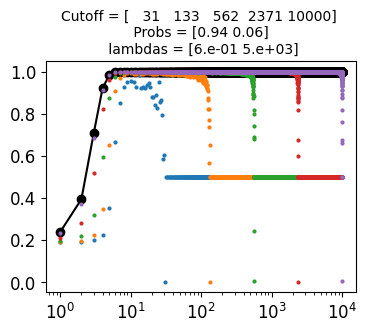

In [350]:
# h = hmatrix_a[-1].copy()
# h = h[0]/h.sum(0)
plt.plot(np.arange(1, num_states), ps_composite[1:], '-o', c = 'k')
plt.plot(np.arange(1, num_states+1), hmatrix_a.transpose(),'o', ms= 2)
# plt.plot(np.arange(1, num_states+1), hmatrix_a.transpose())


plt.xscale('log')
plt.title(f'Cutoff = {(L_cutoffs*num_states).astype(int)} \n Probs = {np.array([0.94, 0.06])} \n lambdas = {np.array([0.6, 5000])}', fontsize = 10)
# plt.yscale('log')

# plt.ylim(0.0, 1.001)

Text(0.5, 1.0, 'Cutoff = [   31   133   562  2371 10000] \n Probs = [0.94 0.06] \n lambdas = [6.e-01 5.e+03]')

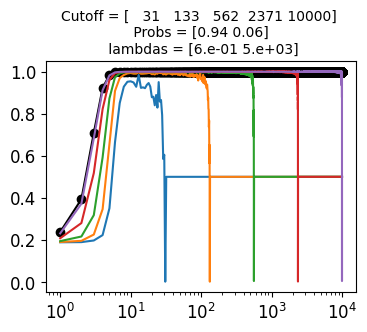

In [325]:
# h = hmatrix_a[-1].copy()
# h = h[0]/h.sum(0)
plt.plot(np.arange(1, num_states), ps_composite[1:], '-o', c = 'k')
plt.plot(np.arange(1, num_states+1), hmatrix_a.transpose())

plt.xscale('log')
plt.title(f'Cutoff = {(L_cutoffs*num_states).astype(int)} \n Probs = {np.array([0.94, 0.06])} \n lambdas = {np.array([0.6, 5000])}', fontsize = 10)
# plt.yscale('log')

# plt.ylim(0.0, 1.001)

In [330]:
probL = np.zeros((len(L_cutoffs), num_states))
for idxp, policy in enumerate(hmatrix_a):

    for i_length, l in enumerate(range(1,num_states+1)):
        probL[idxp, i_length] = np.prod(np.append(policy[:l-1], 1-policy[l-1]))


(1e-10, 1)

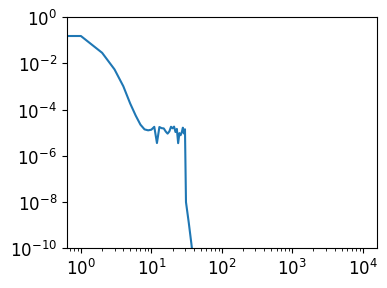

In [341]:
plt.loglog(probL[0], alpha = 1)
plt.ylim(1e-10, 1)

# Learning $\pi_s(L) = P(L)$
Only makes sense with $\eta = 1$ (i.e. what you have done in prior steps is useless!!!!!)

In [ ]:
class simul_pl_learning():
    def __init__(self, L_max, eta, gamma):     
        
        
        self.L_max = L_max
        
        self.num_states = 1    
        self.h_matrix = np.ones(self.L_max).astype(float)
        self.eta = eta
        self.gamma_damping = gamma
        
        self.reset()
        
    def reset(self):
        self.g_matrix = np.zeros(self.L_max).astype(float)              
        
        
    def reward(self, length, reward = 1):
            #NOTE: state is length-1 because counter starts in 0 
            #(but in 0, agent has already performed a step of length 1 -- from the previous action "rotate").

            factor = 1 - self.eta
            
            # damping before adding up the traversed edges.
            self.g_matrix[:length] *= (factor**np.arange(length))
            # set to one all previous states (adding up the traversed edges)
            self.g_matrix[:length] += 1   
            # multiply by eta**x all previous states
            self.g_matrix[:length] *= (factor**np.arange(length))[::-1]
            # multiply the rest of the matrix by number of steps don
            self.g_matrix[length:] *= factor**length

            
            if self.gamma_damping > 0:
                for _ in range(length):
                    self.h_matrix -= self.gamma_damping*(self.h_matrix - 1.)

            self.h_matrix += self.g_matrix*reward

In [ ]:
k = np.ones(10)
length = 5
k[:length] *= (factor**np.arange(length))
k[:length] += 1
k[:length] *= (factor**np.arange(length))[::-1]
k[length:] *= factor**length
k

array([1.3122 , 1.3851 , 1.4661 , 1.5561 , 1.6561 , 0.59049, 0.59049,
       0.59049, 0.59049, 0.59049])

In [ ]:
            # set to one all previous states (adding up the traversed edges)
            self.g_matrix[:length] += 1   
            # multiply by eta**x all previous states
            self.g_matrix[:length] *= (factor**np.arange(length))[::-1]

In [ ]:
alphas =  [0.5, 1, 1.5]
L_max = 1000
hmatrix_a = np.zeros((len(alphas), L_max))

epochs = int(1e3); steps = int(1e2)
for idxa, alpha in enumerate(tqdm(alphas)):
    
    ps = simul_pl_learning(L_max = L_max,
                           eta = 1,
                           gamma = 0)
    step = []
    for e in tqdm(range(epochs)):

        ps.reset()

        for s in range(steps):    
            
            current_step = int(discrete_pw_sample(alpha))
            while current_step > L_max:
                current_step = int(discrete_pw_sample(alpha))
                
            step.append(current_step)
            ps.reward(length = step[-1])
    hmatrix_a[idxa] = ps.h_matrix

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

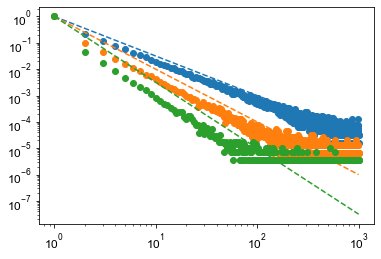

In [ ]:
for idx, hm in enumerate(hmatrix_a):
    plt.loglog(np.arange(1, L_max+1), hm/hm[0], 'o')
    plt.loglog(np.arange(1, L_max+1), np.arange(1, L_max+1).astype(float)**(-alphas[idx]-1), c = f'C{idx}', ls = '--')
# plt.xlim(xmax = 300)

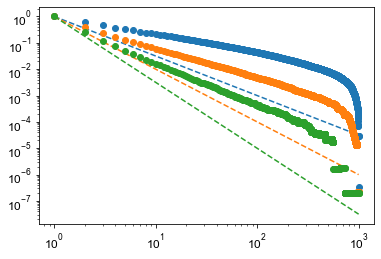

In [ ]:
for idx, hm in enumerate(hmatrix_a):
    plt.loglog(np.arange(1, L_max+1), hm/hm[0], 'o')
    plt.loglog(np.arange(1, L_max+1), np.arange(1, L_max+1).astype(float)**(-alphas[idx]-1), c = f'C{idx}', ls = '--')
# plt.xlim(xmax = 300)

In [ ]:
u

array([100])

[<matplotlib.lines.Line2D>]

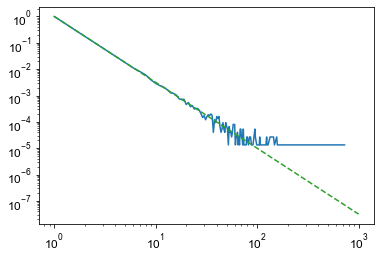

In [ ]:
u,c= np.unique(step, return_counts=True)
plt.loglog(u,c/c[0])
plt.loglog(np.arange(1, L_max+1), np.arange(1, L_max+1).astype(float)**(-alphas[idx]-1), c = f'C{idx}', ls = '--')

# Figure paper fake-training

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from rl_optimal_search.theory import discrete_composite_sample, discrete_pw_sample, simul_2actions, get_ps_composite, get_ps

In [29]:
def hex_rgb(value):
    """Return (red, green, blue) for the color given as #rrggbb."""
    value = value.lstrip('#')
    lv = len(value)
    return np.array(tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3)))/255

### Run

In [2]:
num_states = int(1e4)

# This one for good figure
# epochs = int(1e3); num_steps = int(1e4);

# This one for draft:
epochs = int(1e2); num_steps = int(1e3);

Power law

In [7]:
betas = [0.5, 1, 1.5, 2]
hmatrix_pw = np.zeros((len(betas), 2, num_states))

for idxb, beta in enumerate(tqdm(betas)):
    
    ps = simul_2actions(num_states = num_states,
                        eta = int(1e-7),
                        gamma = 0)
    
    steps = discrete_pw_sample(beta, L_max = num_states, num_samples = int(epochs*num_steps))
    steps = steps.reshape(epochs, num_steps)
                               
    for e in tqdm(range(epochs)):
        ps.reset()
        for s in steps[e]:    
            ps.reward(length = s)
            
    hmatrix_pw[idxb] = ps.h_matrix

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

BiExp

In [8]:
probs = np.array([0.94, 0.06])
lambdas = np.array([0.6, 5000])

lambdas_1 = [0.6, 0.6*2, 0.6*8, 0.6*16]
hmatrix_bi = np.zeros((len(lambdas_1), num_states))

for idx_l, lambda_1 in enumerate(tqdm(lambdas_1)):
    
    ps = simul_2actions(num_states = num_states,
                    eta = int(1e-7),
                    gamma = 0)
    
    lambdas[0] = lambda_1
    steps = discrete_composite_sample(lambdas = lambdas,
                                      probs = probs, 
                                      L_max = num_states, num_samples = num_steps*epochs)
    steps = steps.reshape(epochs, num_steps)
    
    # Training
    for e in tqdm(range(epochs)):
        ps.reset()
        for s in steps[e]:         
            ps.reward(length = s)
    # Saving
    hmatrix_bi[idx_l] = ps.h_matrix[0]/ps.h_matrix.sum(0)


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Cutoff

In [11]:
probs = np.array([0.94, 0.06])
lambdas = np.array([0.6, 5000])
# Get theoretical policy
theory_cutoff = get_ps_composite(L = num_states, lambdas = lambdas, probs = probs)


# Setting a max step length
L_cutoffs = [30, 150, 500, 2000, 10000]

steps_og = discrete_composite_sample(lambdas = lambdas, probs = probs, L_max = num_states, num_samples = num_steps*epochs)


hmatrix_co = np.zeros((len(L_cutoffs), num_states))
for idx_c, L_cutoff in enumerate(tqdm(L_cutoffs)):
    # L_cutoff *= num_states

    steps = steps_og.copy()
    while np.max(steps) > L_cutoff:
            steps[steps > L_cutoff] = discrete_composite_sample(lambdas = lambdas, 
                                                                probs = probs,
                                                                L_max = num_states, num_samples = len(steps[steps > L_cutoff]))
    steps = steps.reshape(epochs, num_steps)
    ps = simul_2actions(num_states = num_states,
                    eta = int(1e-7),
                    gamma = 0)
    # Training
    for e in (range(epochs)):
        ps.reset()
        for s in steps[e]:         
            ps.reward(length = s)
    # Saving
    hmatrix_co[idx_c] = ps.h_matrix[0]/ps.h_matrix.sum(0)


  0%|          | 0/5 [00:00<?, ?it/s]

### Plot

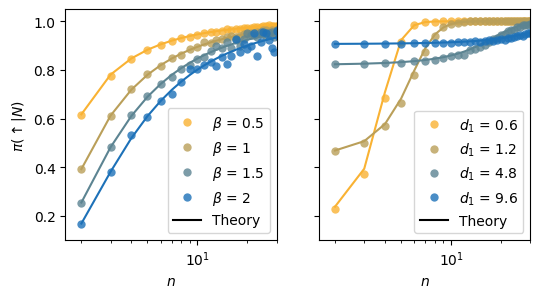

In [31]:
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

list_color = [hex_rgb(i) for i in ['f9b233ff', '1d71b8ff']]
cmap_list = LinearSegmentedColormap.from_list("", list_color, N = 8)
def color(idx, cmap = cmap_list, num_c = 4):
    return cmap(np.linspace(0, 1, num_c)[idx])

fig, [ax_pw, ax_bi] = plt.subplots(1, 2, figsize = (6,3))
font_legend = 10

############# Powerlaw #################
for idx, (h, beta) in enumerate(zip(hmatrix_pw, betas)):
    if idx == 0: label = 'Theory'
    else: label = ''
    
    theory = get_ps(ps.num_states, alpha = beta, ps_0 = 1)
    ax_pw.plot(np.arange(2, num_states+1), theory[1:], c = color(idx))
    ax_pw.plot(np.arange(2, num_states+2), h[0,:]/h.sum(0), 'o', 
               c = color(idx),  label = fr'$\beta$ = {beta}', alpha = 0.8, markeredgecolor='None', lw = 0.05)

# plt.setp(ax_pw, xlim = (1.8, 30), ylim = (0.0, 1.01),
#          xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
#          yticks = np.round(np.arange(0.2, 1.01, 0.2),1),
#          yticklabels = np.round(np.arange(0.2, 1.01, 0.2),1).astype(str),
#          xscale = 'log')

ax_pw.plot(10, 10, label = 'Theory', c = 'k')   
ax_pw.legend(fontsize = font_legend)
   
    
############# BiExp #################
for idx, (lambda_1, h) in enumerate(zip(lambdas_1, hmatrix_bi)):    
    lambdas[0] = lambda_1    
    ps_composite = get_ps_composite(num_states, lambdas = lambdas, probs = probs)
    ax_bi.plot(np.arange(2, num_states+1), ps_composite[1:], '-', 
               c = color(idx))    
    ax_bi.plot(np.arange(2, num_states+2), h, 'o',               
               c = color(idx),  label = fr'$d_1$ = {np.round(lambda_1,1)}', alpha = 0.8, markeredgecolor='None')

ax_bi.plot(10, 10, label = 'Theory', c = 'k')   
ax_bi.legend(fontsize = font_legend)
    
    
plt.setp(ax_pw, xlabel =r'$n$', ylabel = r'$\pi(\uparrow|N)$', xscale = 'log')
plt.setp([ax_pw, ax_bi], xlim = (1.6, 30), ylim = (0.1, 1.049972989855765)) ;
plt.setp(ax_bi, ylabel = '', xlabel = r'$n$', yticklabels = [], xscale = 'log');


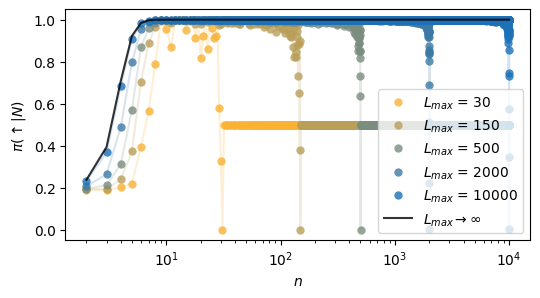

In [36]:
fig, ax_co = plt.subplots(figsize = (6, 3))

############# Cutoff #################
for idx, (h, L_cutoff) in enumerate(zip(hmatrix_co, L_cutoffs)):   
    ax_co.plot(np.arange(2, num_states+2), h, 'o',               
               c = color(idx, num_c=5),  label = r'$L_{max}$ = '+f'{L_cutoff}', alpha = 0.8, markeredgecolor='None', rasterized=True)
    ax_co.plot(np.arange(2, num_states+2), h,                
               c = color(idx, num_c=5),  alpha = 0.2)

ax_co.plot(np.arange(2, num_states+1), theory_cutoff[1:], '-', c = 'k', alpha = 0.8, label = r'$L_{max}\rightarrow \infty$') 

plt.legend(fontsize = font_legend,  loc = 'lower right')

########### Shared ################
    
plt.setp(ax_co, xlabel =r'$n$', ylabel = r'$\pi(\uparrow|N)$', xscale = 'log')


# ax_pw.set_title('a) Power law', fontsize = font_legend)
# ax_bi.set_title('b) Bi-exponential', fontsize = font_legend)
# ax_co.set_title('Power law')

# for a, let in zip([ax_pw, ax_bi, ax_co], 'abc'):
#     a.annotate(let+')', xy = (0.02, 0.92),  fontsize = 12, xycoords = 'axes fraction') ;
    
fig.savefig('../../../overleaf/optimal_rl/figures/fake_training_cutoff.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)

# nbdev

In [27]:
from nbdev import nbdev_export ; nbdev_export()